In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Error: Error: Jupyter server crashed. Unable to connect. 
Error code from jupyter: 1

In [2]:
x= np.ones((10, 10))

In [3]:
def generate_fractal(depth):
    n = 4**depth
    

In [145]:
# Tegne fraktaler med turtle

from turtle import *

# function to create koch snowflake or koch curve 
pos_dict = {}
def snowflake(lengthSide, levels): 
    if levels == 0: 
        forward(lengthSide) 
        return
    lengthSide /= 3.0
    snowflake(lengthSide, levels-1) 
    left(60) 
    snowflake(lengthSide, levels-1) 
    right(120) 
    snowflake(lengthSide, levels-1) 
    left(60) 
    snowflake(lengthSide, levels-1)
    
def frac_turtle(L,depth):
    assert isinstance(depth, int)
    if depth ==0:
        pos_dict[map(int, position())] ="b"        
        forward(L)
    else:
        L /= 4.0
        frac_turtle(L,depth-1) # move forward
        left(90)
        frac_turtle(L,depth-1)
        right(90)
        frac_turtle(L,depth-1)
        right(90)
        frac_turtle(L,depth-1)
        frac_turtle(L,depth-1)
        left(90)
        frac_turtle(L,depth-1)
        left(90)
        frac_turtle(L, depth-1)
        right(90)
        frac_turtle(L, depth-1)
    return

if __name__ == "__main__": 
    speed(0)                    
    penup()
    length = 1024.0
    #left(90)
    #forward(1.5*length)
    #right(90)
    #forward(length/2)
    #backward(length/2)
    pendown()
    n  = 4
    for j in [4]:
        for i in range(n):     
            #snowflake(length, j) 
            frac_turtle(length, j)
            right(360/n)

  
     # To control the closing windows of the turtle 
    mainloop()

Terminator: 

In [90]:
import numba as nb

Type:        module
String form: <module 'numba' from 'C:\\Users\\KarlKristian\\Anaconda3\\envs\\numfys\\lib\\site-packages\\numba\\__init__.py'>
File:        c:\users\karlkristian\anaconda3\envs\numfys\lib\site-packages\numba\__init__.py
Docstring:   Expose top-level symbols that are safe for import *


In [29]:
(x, y) = map(int,position())

In [99]:
#@jitclass(spec=[('orient',int8),('position',nb.int32)])
class Walker(object):
    
    def __init__(self,i=0,j=0):
        self.position = [i,j]
        self.orient = 0
        
    def r(self):
        self.orient = (self.orient + 1) % 4
    def l(self):
        self.orient = (self.orient -1) % 4
    def f(self,L):
        if self.orient == 0: # Beveger seg mot høyre
            pos = self.position[0], self.position[1] + L
            self.position = pos
        elif self.orient == 1: # Beveger seg nedover
            pos = self.position[0] + L, self.position[1]
            self.position = pos
        elif self.orient == 2: # Beveger seg mot venstre
            pos = self.position[0], self.position[1] - L
            self.position = pos
        elif self.orient == 3: # Beveger seg oppover
            pos = self.position[0]-L, self.position[1]
            self.position = pos
#     def get_pos(self):
#         return self._position

In [114]:
walk = Walker(0,0)

In [116]:
walk.position
walk.f(10)

In [111]:
walk.f(10)
walk.position

(0, 100)

In [112]:
walk.r()
walk.f(10)

In [113]:
walk.position

(10, 100)

In [78]:
from numba import jit, jitclass, int8

In [22]:
@jit
def get_init_matrix(g):
    """
    Takes the recursion depth as input.
    """
    pad = 1.9 # ~Max height of the recursion (visually)
    n = int(2*4**g)
    N = int(n*pad)
    #print(N, n)
    MATRIX = np.negative(np.ones((N, N)))
    c1 = int((N-n)/2)
    c2 = int((N+n)/2)
    MATRIX[c1:c2, c1:c2] *=-1
    return MATRIX, c1, c2
        


def fiks(mat, i,j, l):
        mat[i-l:i, j+l:j+2*l] *= -1
        mat[i:i+l, j+2*l:j+3*l] *= -1

def create_frac(mat, i,j, L, depth):
    assert isinstance(depth, int)
    if depth ==0:
        fiks(mat,i,j,L)
    else:
        l = int(L/4)
        j = i+l
        create_frac(mat,i,j,l,depth-1) # move forward
        np.rot90(mat, 3)
        

Wall time: 1.32 s


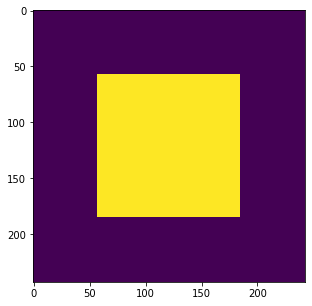

In [10]:
%time r = get_init_matrix(3)
M, c1, c2 = r
plt.figure(figsize=(5, 5))
plt.imshow(M)
#plt.colorbar()

In [23]:
L = c2-c1
l = int(L/4)
mat=M.copy()


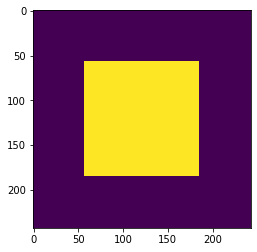

In [28]:
fiks(mat, c1, c1, l)
plt.imshow(mat)

In [45]:
def fractal(M, c1, c2, g):
    """
    M: matrix to create fractal out of.
    c1: lowest index
    c2: highest index
    g: recursion depth
    """
    p1 = (c1, c1)
    p2 = (c1, c2)
    p3 = (c2, c2)
    p4 = (c2, c1)
    
    def add_fractal_pattern(mat, i, j, l):
        mat[i-l:i, j+l:j+2*l] *= -1
        mat[i:i+l, j+2*l:j+3*l] *= -1
    
    def recursion(M, startpoint, endpoint, depth):
        if depth ==0:
            add_fractal_pattern(M,...)
        else:
            l = max(endpoint-startpoint)
            

In [55]:
for i,j in zip((3, 4), (1, 5)):
    print(i-j)

2
-1
